In [179]:
import pandas as pd

#데이터셋 불러오기
df = pd.read_csv("netflix_reviews.csv")
# 데이터셋 크기와 열 정보 출력
print(f"Shape of the dataset: {df.shape}")
print(f"Columns in the dataset: {df.columns}")

Shape of the dataset: (117040, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [180]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

# 불필요한 열 제거
df = df[['content', 'score']]

# 리뷰 텍스트 정제
df['content'] = df['content'].apply(preprocess_text)

# 평점을 이진 레이블로 변환 (예: 4점 이상은 긍정, 그 외는 부정)
df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

positive_reviews = df[df['sentiment'] == 1]['content']
negative_reviews = df[df['sentiment'] == 0]['content']

# 전처리된 데이터 확인
df.head()

,content,score,sentiment
0,very good experience great customer service,5,1
1,bro i was watching w cartoon then this error c...,1,0
2,desent,5,1
3,this is scam company they just loot people mon...,1,0
4,stopped opening ive uninstalled and reinstalle...,1,0


In [249]:
# 시리즈데이터를 워드클라우드로 쓰기 편하게 텍스트 파일르 변환
positive_reviews.to_csv('positive.txt', index=False, header=None, sep="\t")
negative_reviews.to_csv('negative.txt', index=False, header=None, sep="\t")

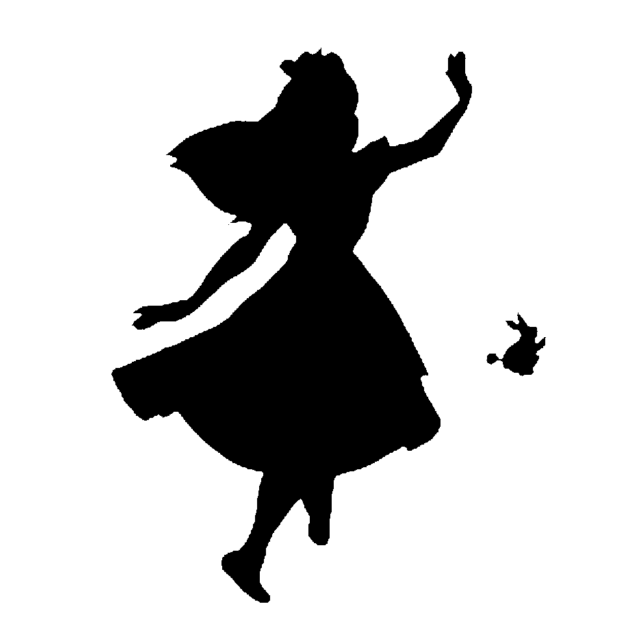

In [275]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

# 텍스트파일 열기
text = open('/Users/t2023-m0072/Desktop/ml_team_task/challenge/negative.txt').read()
# 마스크 이미지 가져오기
alice_mask = np.array(Image.open('/Users/t2023-m0072/Desktop/images/alice_mask.png'))

# 불용어 지정
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'movies', 'show', 'shows', 'watch', 'account', 'time', 'app', 'series', 'phone', 'good','use','now','cant','dont','even'])

# 이미지 확인
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

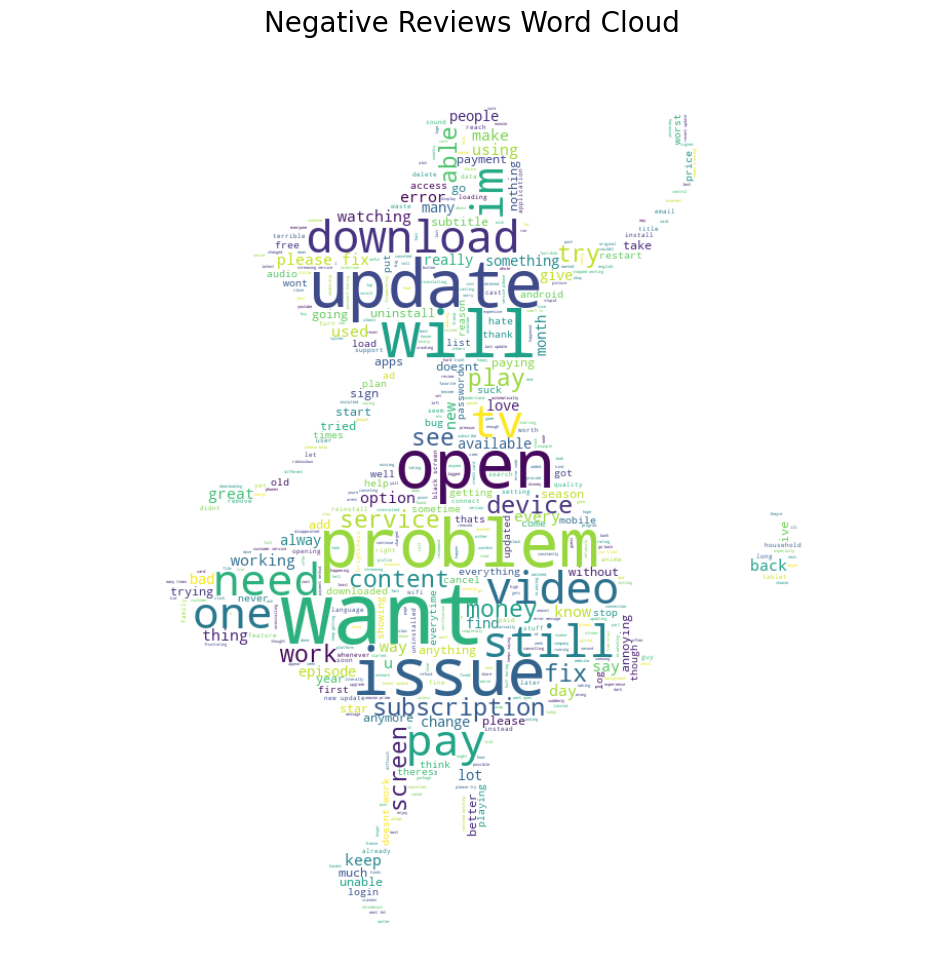

In [277]:
# 단어들 설정과 빈도분석
wc = WordCloud(background_color = 'white', max_words = 1000, mask = alice_mask, stopwords=stopwords)
wc = wc.generate(text)                 

# 워드클라우드생성
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud', size=20)
plt.axis('off')
plt.show()

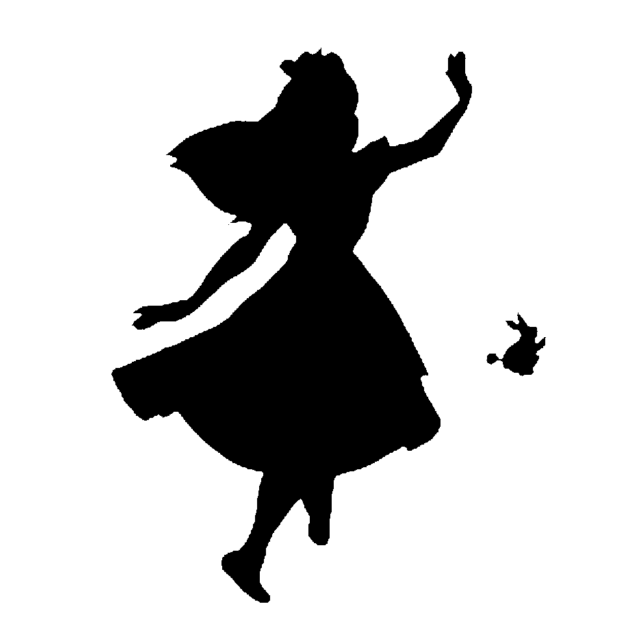

In [278]:
# 텍스트파일 열기
text1 = open('/Users/t2023-m0072/Desktop/ml_team_task/challenge/positive.txt').read()
# 마스크 이미지 가져오기
alice_mask = np.array(Image.open('/Users/t2023-m0072/Desktop/images/alice_mask.png'))

# 불용어 지정
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'movies', 'show', 'shows', 'watch', 'account', 'time', 'app', 'series', 'phone','use','now','problem','cant','dont','even'])

# 이미지 확인
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 단어들 설정과 빈도분석
wc = WordCloud(background_color = 'white', max_words = 1000, mask = alice_mask, stopwords=stopwords)
wc = wc.generate(text)                  

# 워드클라우드생성
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud', size=20)
plt.axis('off')
plt.show()